In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the provided data
loan = pd.read_csv('loan.csv', low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# <font color='green'>Step1:Data Understanding</font>

##  <font color='orange'>Step1a:Handling Null values<font>

In [3]:
#Find what percentage of null values are present in each column
missing_percent = (loan.isnull().sum()/len(loan.index))*100
#Check which columns have what percent of missing values
missing_percent

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

##### Observation:
There are many columns which have 100% missing values and some columns have less.Let us drop columns which have more than 25% values missing,otherwise those columns wont make much sense

In [4]:
#Drop columns which have more than 25% null values in it.
loan.drop(missing_percent[ missing_percent > 25 ].index, axis=1, inplace=True)

## <font color='orange'>1b:Unique value check</font>

In [5]:
loan.nunique().sort_values(ascending=False)

id                            39717
member_id                     39717
url                           39717
total_pymnt                   37850
total_pymnt_inv               37518
total_rec_int                 35148
last_pymnt_amnt               34930
emp_title                     28820
revol_bal                     21711
title                         19615
installment                   15383
funded_amnt_inv                8205
total_rec_prncp                7976
annual_inc                     5318
recoveries                     4040
dti                            2868
collection_recovery_fee        2616
total_rec_late_fee             1356
out_prncp_inv                  1138
out_prncp                      1137
revol_util                     1089
funded_amnt                    1041
loan_amnt                       885
zip_code                        823
earliest_cr_line                526
int_rate                        371
last_credit_pull_d              106
last_pymnt_d                

##### Observation:
Columns 'pymnt_plan', 'initial_list_status' ,'collections_12_mths_ex_med' ,'policy_code' ,'application_type' ,'acc_now_delinq' ,'chargeoff_within_12_mths' ,'delinq_amnt' ,'tax_liens'  have only one unique value which will not add any value to our analysis so let us drop them

In [6]:
#Dropping columns which have only one unique value
loan.drop(['pymnt_plan', 'initial_list_status' ,'collections_12_mths_ex_med' ,'policy_code' ,'application_type' ,'acc_now_delinq' ,'chargeoff_within_12_mths' ,'delinq_amnt' ,'tax_liens'], axis=1, inplace=True)

## <font color='orange'>1c:Relevancy Check</font>

##### Observation:
Since when the company receives a loan application, the company has to make a decision for loan approval but there are many columns which are related to post approval of loan,so we have to drop them-- 
'total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d','out_prncp', 'out_prncp_inv'

In [7]:
loan.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d','out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [8]:
loan.nunique().sort_values(ascending=False)

url                     39717
member_id               39717
id                      39717
total_pymnt             37850
total_pymnt_inv         37518
last_pymnt_amnt         34930
emp_title               28820
revol_bal               21711
title                   19615
installment             15383
funded_amnt_inv          8205
annual_inc               5318
dti                      2868
revol_util               1089
funded_amnt              1041
loan_amnt                 885
zip_code                  823
earliest_cr_line          526
int_rate                  371
total_acc                  82
issue_d                    55
addr_state                 50
open_acc                   40
sub_grade                  35
purpose                    14
emp_length                 11
delinq_2yrs                11
inq_last_6mths              9
grade                       7
home_ownership              5
pub_rec                     5
verification_status         3
loan_status                 3
pub_rec_ba

##### Observation:
1.As seen in the above output  'url' ,'member_id' , 'id' have all unique values so we will retain just 'id' and drop  'url' and 'member_id'.

2.'emp_title' has job title supplied by borrowers so these names would not add value to the analysis hence dropping off

In [9]:
loan.drop(['url','member_id','emp_title'], axis=1, inplace=True)

##### Observation:
'loan_status' column has 3 distinct values-'Fully Paid','Charged Off','Current'. We dont need 'Current' as it doesnt tell whether the loan will be defaulted or not so rows containing it will be removed

In [10]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [11]:
#Removing rows having Current as loan_status
loan = loan[loan.loan_status != 'Current']

##### The values of column 'term' have empty space so it will be stripped

In [12]:
#Checking unique values for 'term' column
loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [13]:
#Stripping off empty space
loan['term'] = loan.term.str.strip()
loan.term.unique()

array(['36 months', '60 months'], dtype=object)

In [14]:
loan.shape

(38577, 32)

# <font color='green'>Step2:Data Cleaning and Manipulation</font>

## <font color='orange'>2a:Handling missing values</font>

In [15]:
#Find what percentage of null values are present in each column
missing_percent = (loan.isnull().sum()/len(loan.index))*100
#Check which columns have what percent of missing values
missing_percent.sort_values(ascending=False)

emp_length              2.677761
pub_rec_bankruptcies    1.806776
revol_util              0.129611
title                   0.028514
grade                   0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
installment             0.000000
loan_status             0.000000
int_rate                0.000000
term                    0.000000
funded_amnt_inv         0.000000
funded_amnt             0.000000
loan_amnt               0.000000
issue_d                 0.000000
purpose                 0.000000
last_pymnt_amnt         0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
total_pymnt             0.000000
total_pymn

### Columns 'emp_length','pub_rec_bankruptcies','revol_util','title' have missing values so let us handle them

#### Handling missing values for 'emp.length'

In [16]:
loan.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [17]:
loan.emp_length.mode()

0    10+ years
dtype: object

##### Above data shows that for 'emp.length' mode is 10+ years and it has far higher frequency than next value,so we can safely impute with mode

In [18]:
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)

#### Handling missing values for 'pub_rec_bankruptcies'

In [19]:
loan.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [20]:
loan.pub_rec_bankruptcies.mode()

0    0.0
dtype: float64

##### Above data shows that for 'pub_rec_bankruptcies' mode is 0.0 and it has far far higher frequency than next value,so we can safely impute with mode

In [21]:
loan.pub_rec_bankruptcies.fillna(loan.pub_rec_bankruptcies.mode()[0], inplace = True)

#### Handling missing values for 'revol_util'

In [22]:
loan.revol_util.value_counts()

0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
66.70%     56
61%        56
70.40%     56
66.60%     55
46.40%     55
37.60%     55
0.10%      55
57.40%     55
32%        54
46.60%     54
64.60%     54
64.80%     54
75.50%     54
34.40%     53
48.90%     53
68.70%     53
35.30%     53
25.50%     53
49.80%     53
65.90%     53
70.80%     53
45.60%     52
47.80%     52
48%        52
89.50%     52
         ... 
13.56%      1
47.36%      1
41.85%      1
49.69%      1
0.75%       1
25.33%      1
6.75%       1
94.46%      1
17.78%      1
1.88%       1
26.32%      1
37.63%      1
54.22%      1
12.42%      1
70.94%      1
9.34%       1
56.26%      1
8.46%       1
33.29%      1
77.63%      1
23.11%      1
0.01%       1
18.82%      1
25.74%      1
34.89%      1
37.73%      1
39.95%      1
24.89%      1
0.83%       1
26.33%      1
Name: revol_util, Length: 1088, dtype: int64

In [23]:
loan.revol_util.mode()

0    0%
dtype: object

##### Above data shows that for 'revol_util' mode is 0% and it has far far higher frequency than next value,so we can safely impute with mode

In [24]:
loan.revol_util.fillna(loan.revol_util.mode()[0], inplace = True)

#### Handling missing values for 'title'

In [25]:
loan.title.value_counts()[:5]

Debt Consolidation         2090
Debt Consolidation Loan    1620
Personal Loan               641
Consolidation               491
debt consolidation          478
Name: title, dtype: int64

In [26]:
loan.title.mode()

0    Debt Consolidation
dtype: object

##### Above data shows that 'Debt Consolidation' , 'Debt Consolidation Loan' ,'Consolidation' which basically mean the same are the most popular choice.Hence replacing by the mode 

In [27]:
loan.title.fillna(loan.title.mode()[0], inplace = True)

In [28]:
#Find what percentage of null values are present in each column
missing_percent = (loan.isnull().sum()/len(loan.index))*100
#Check which columns have what percent of missing values
missing_percent.sort_values(ascending=False)

pub_rec_bankruptcies    0.0
last_pymnt_amnt         0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
delinq_2yrs             0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
total_pymnt             0.0
total_pymnt_inv         0.0
id                      0.0
dtype: float64

#### We have successfully handled all missing values

## <font color='orange'>2b:Data type check and conversions to suitable format</font>

In [29]:
#Check data type of each column
loan.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_

####  'issue_d' ,'earliest_cr_line' columns have to be converted to same  datetime format 

In [30]:
loan['earliest_cr_line'] = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan['issue_d'] = pd.to_datetime(loan.issue_d, format='%b-%y')

####  'int_rate' ,'revol_util' columns have '%' symbol which has to be removed so that our libraries treat them as float values

In [31]:
loan['revol_util'] = loan.revol_util.str.strip('%').astype(float)
loan['int_rate'] = loan.int_rate.str.strip('%').astype(float)

## <font color='orange'>2c:Outlier Detection and handling</font>

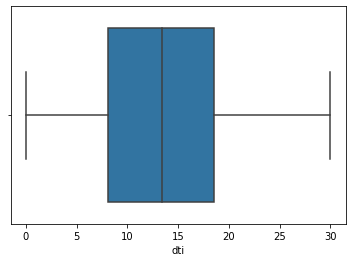

In [32]:
sns.boxplot(loan.dti)

##### Observation:
'dti' data looks good and does not contain outliers

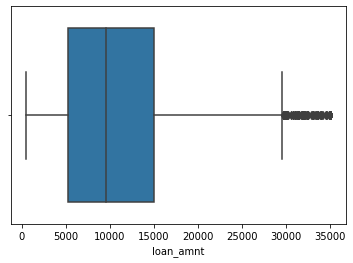

In [33]:
sns.boxplot(loan.loan_amnt)

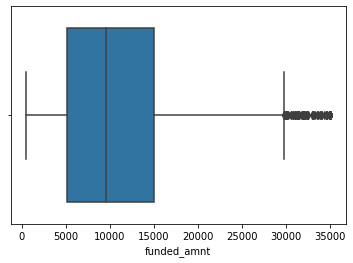

In [34]:
sns.boxplot(loan.funded_amnt)

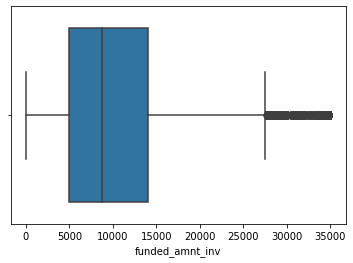

In [35]:
sns.boxplot(loan.funded_amnt_inv)

##### Observation:

1.'loan_amnt' is the loan amount requested by a borrower;'funded_amnt' ,'funded_amnt_inv' are respectively the amount committed to the loan and amount committed by the investor.

2. All the three graphs look consistent with each other and related to each other.In business terms it means that certain customers requested for higher loan and same was committed to them. 

3.Looking at the consistency of the three variables, in my opinion they dont need outlier treatment 

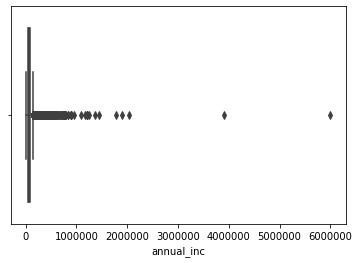

In [36]:
sns.boxplot(loan.annual_inc)

In [37]:
loan.annual_inc.quantile([0.25,0.50, 0.75,0.90, 0.95, 0.99, 1.0])

0.25      40000.0
0.50      58868.0
0.75      82000.0
0.90     115000.0
0.95     140004.0
0.99     234144.0
1.00    6000000.0
Name: annual_inc, dtype: float64

#### Observation:
There are few outliers which will impact our analysis by skewing it ,so we will remove the outlier beyond quantile 0.9

In [38]:
loan = loan[loan.annual_inc < loan['annual_inc'].quantile(0.90)]

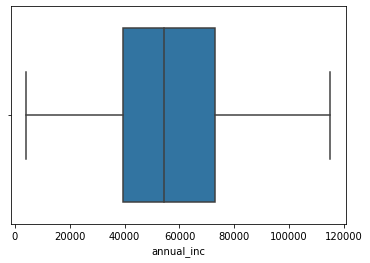

In [39]:
sns.boxplot(loan.annual_inc)

##### All the outliers are removed now from 'annual_inc'

# <font color='green'>Step3:Data Analysis</font>

## <font color='orange'>3a:Univariate & Segmented Univariate Analysis</font>

### What percent of loan is Fully Paid vs. Charged Off

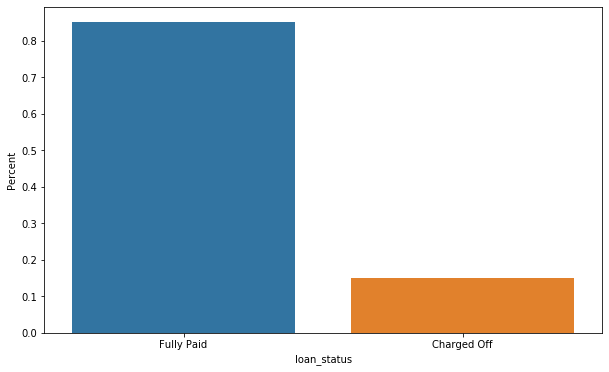

In [40]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x='index', y='loan_status', data=loan['loan_status'].value_counts(normalize=True).reset_index())
plt.xlabel('loan_status')
plt.ylabel('Percent')
plt.show()

##### Observation:
85% of the borrowers have fully paid the loan while around 15% is Charged Off

### Analyzing loans taken for which pupose is 'Charged Off' most frequently

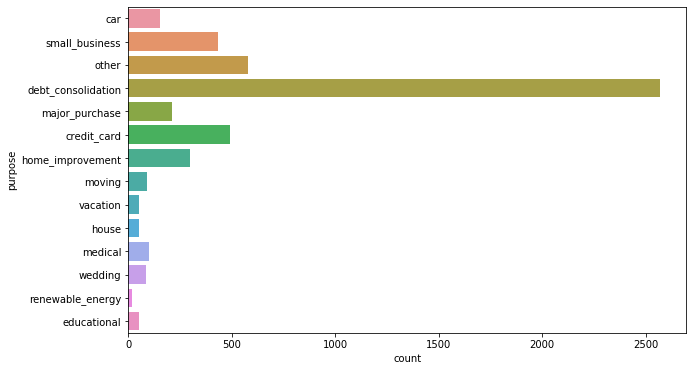

In [41]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(y ='purpose', data=loan[loan.loan_status == 'Charged Off'])

##### Observation:
The loans taken for debt consolidation are Charged Off most often compared to loans taken for other purpose

### Analyzing which term loans are'Charged Off' most frequently

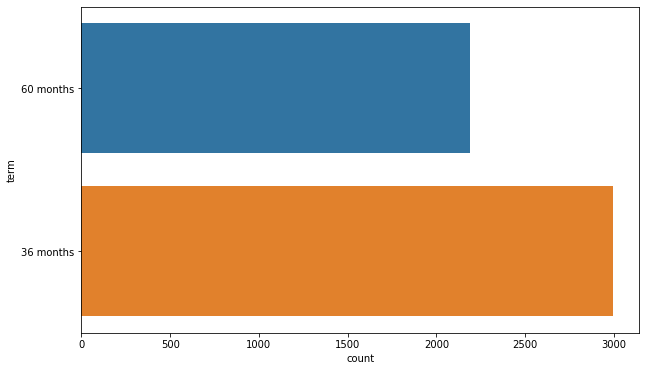

In [42]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(y ='term', data=loan[loan.loan_status == 'Charged Off'])

##### Observation:
36 months term loan are Charged Off more frequently than 60 months

### Analyzing which 'grade' loans are'Charged Off' most frequently

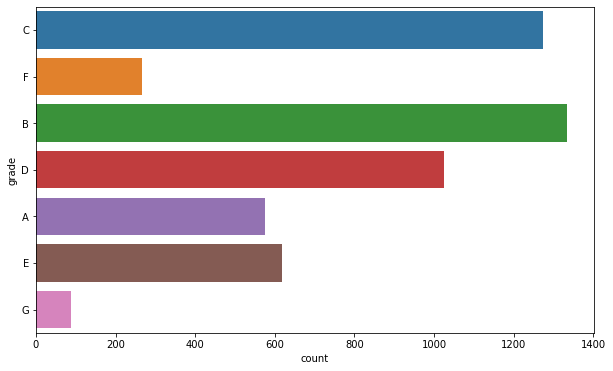

In [43]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(y ='grade', data=loan[loan.loan_status == 'Charged Off'])

##### Observation:
B,C followed by D grade loan are Charged Off more frequently compared to other grades

### Analyzing which 'sub_grade' loans are'Charged Off' most frequently

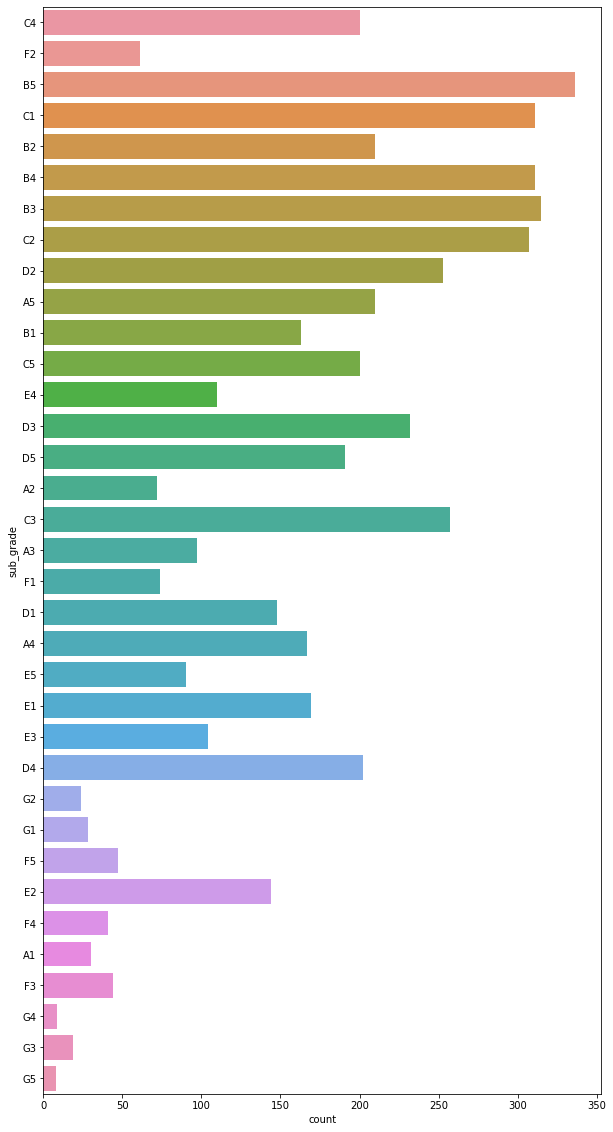

In [44]:
fig, ax = plt.subplots(figsize = (10,20))
sns.countplot(y ='sub_grade', data=loan[loan.loan_status == 'Charged Off'])

##### Observation:
B5 followed by B3 sub-grade loan are Charged Off more frequently compared to other sub-grades

### Analyzing employees working for how long('emp_length') have loans which are'Charged Off' most often

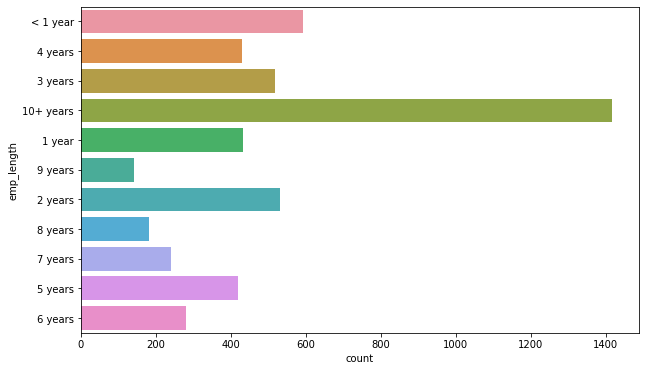

In [45]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(y ='emp_length', data=loan[loan.loan_status == 'Charged Off'])

##### Observation:
Employees who are working for 10+ years have most 'Charged Off' loans

### Analyzing loans in which state('addr_state') are 'Charged Off' most often 

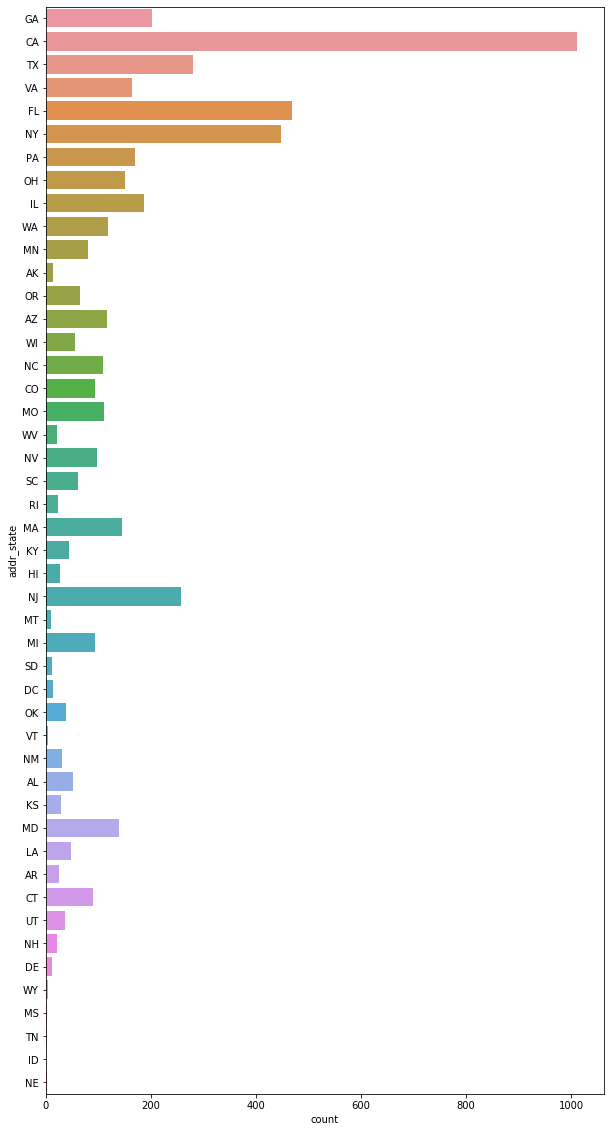

In [46]:
fig, ax = plt.subplots(figsize = (10,20))
sns.countplot(y ='addr_state', data=loan[loan.loan_status == 'Charged Off'])

##### Observation:
Loans in the state of CA(California) are "Charged Off" most often so banks in CA have to be more vigilant before sanctioning loan

### Analyzing what 'verification_status' are 'Charged Off' most often 

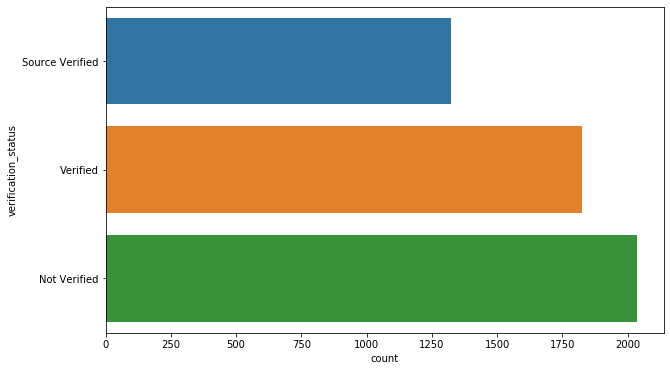

In [47]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(y ='verification_status', data=loan[loan.loan_status == 'Charged Off'])

##### Observation:
Loans with 'verification_status' as 'Not Verified' are 'Charged Off' most often

### Analyzing borrowers with which 'home_ownership' are 'Charged Off' most often 

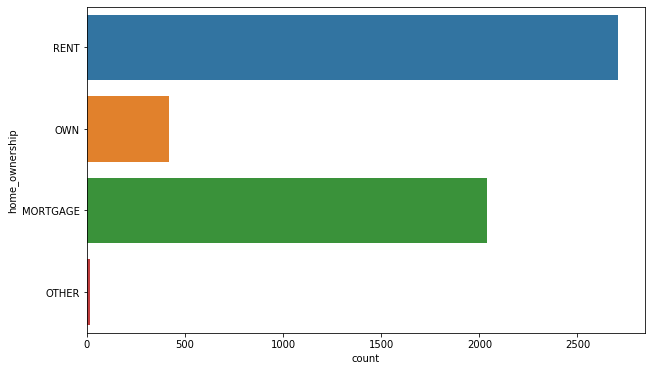

In [48]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(y ='home_ownership', data=loan[loan.loan_status == 'Charged Off'])

##### Observation:
People who are in rented home are Charged Off most often

## <font color='orange'>3b:Derived Variables</font>

### Derive a variable to find what percent of loan requested was funded most commonly

In [49]:
loan['percent_loan_funded'] = loan.funded_amnt_inv*100/loan.loan_amnt

In [50]:
print(loan['percent_loan_funded'].value_counts())

100.000000    17534
99.500000       320
99.750000       317
99.583333       280
99.791667       221
99.375000       205
98.750000       203
99.166667       203
99.000000       200
97.500000       177
98.333333       174
99.687500       153
99.833333       150
99.875000       146
95.000000       136
97.916667       133
0.000000        122
99.642857       117
99.666667       108
99.900000        97
98.000000        95
95.833333        88
99.843750        87
99.285714        81
99.722222        81
98.500000        77
96.666667        68
98.437500        67
98.958333        67
93.750000        64
              ...  
92.333991         1
95.670103         1
22.878571         1
94.922551         1
99.436069         1
78.982417         1
23.269048         1
58.461457         1
63.606557         1
97.003280         1
60.586452         1
62.307692         1
0.000130          1
99.810964         1
97.689076         1
99.147727         1
96.414000         1
12.996802         1
10.125000         1


##### Observation:
Most commonly 100% of the requested loan amount was funded by investors

### Derive a variable to find how many times your 'annual_inc' should be of loan amount approved by investors('funded_amnt_inv') 

In [51]:
loan['times_income_fundedloan'] = round(loan.annual_inc/loan.funded_amnt_inv)

In [52]:
print(loan['times_income_fundedloan'].value_counts())

4.0            4656
3.0            4300
5.0            4039
6.0            3300
7.0            2543
8.0            2245
2.0            1695
9.0            1631
10.0           1473
11.0           1092
12.0            989
13.0            708
14.0            648
15.0            521
16.0            464
17.0            422
18.0            384
19.0            287
20.0            286
22.0            244
21.0            192
24.0            173
23.0            141
25.0            139
inf             122
28.0            113
26.0            113
30.0            108
27.0            104
32.0             86
               ... 
429.0             1
155.0             1
104.0             1
116.0             1
120.0             1
132.0             1
222.0             1
8039176.0         1
789.0             1
225.0             1
5494917.0         1
250.0             1
126.0             1
122.0             1
226.0             1
309.0             1
24425577.0        1
364.0             1
312.0             1


##### Observation:
Most commonly the annual income of the borrower is 3,4 or 5 times of the  loan amount approved by investors

### Derive variables to get loan issue('issue_d') month and year

In [53]:
loan['issue_year'] = loan['issue_d'].dt.year 
loan['issue_month'] = loan['issue_d'].dt.month 

### Analyzing numeric variables by binning them

In [54]:
#Create bins for interest rate and annual income
loan['int_rate_bins'] = pd.cut(loan['int_rate'], bins=4,precision =0,labels=['5%-10%','11%-16%','17%-22%','23%-28%'])
loan['annual_inc_bins'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels =['3k-30k','31k-58k','59k-86k','87k-114k','115k-142k'])


### Analyzing borrowers in which interest rate group are 'Charged Off' most often 

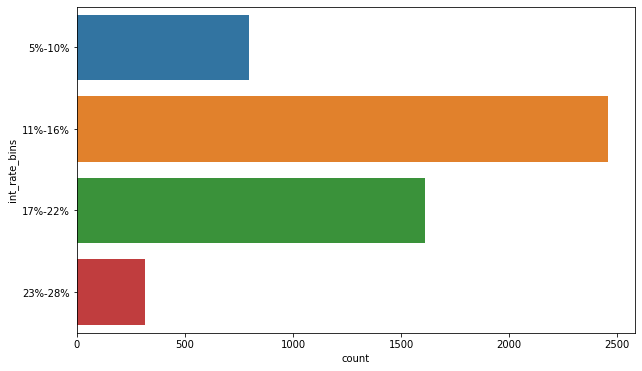

In [55]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(y ='int_rate_bins', data=loan[loan.loan_status == 'Charged Off'])

##### Observation:
Borrowers in interest rate group 11%-16% are most often 'Charged-Off'

### Analyzing borrowers in which Annual income group are 'Charged Off' most often 

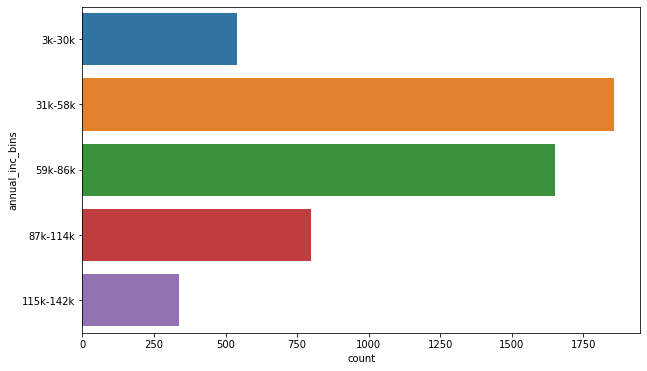

In [56]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(y ='annual_inc_bins', data=loan[loan.loan_status == 'Charged Off'])

##### Observation:
Borrowers with annual income in the range 31K-58K are most often 'Charged-Off'

In [57]:
### Analyzing in which month and year maximum loan was'Charged Off'

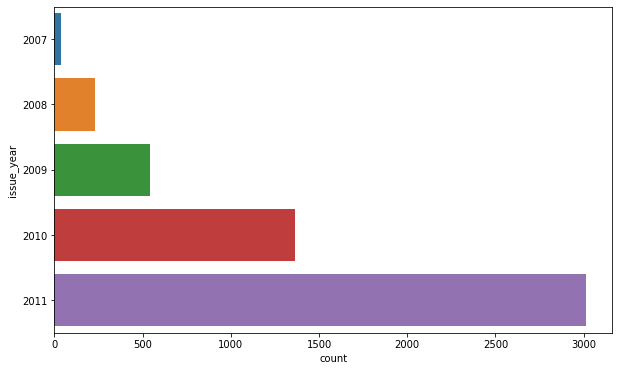

In [58]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(y ='issue_year', data=loan[loan.loan_status == 'Charged Off'])

##### Observation:
Most loans were charged off in the year 2011

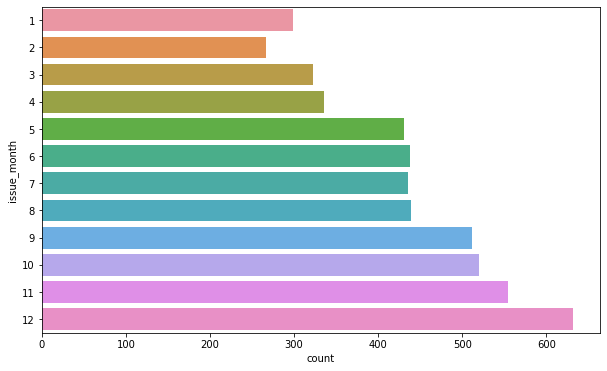

In [59]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(y ='issue_month', data=loan[loan.loan_status == 'Charged Off'])

##### Observation:
Most loans were charged off in the 12th month i.e December

## <font color='red'>Factors leading to higher Charge-off based on Univariate & Segmented Univariate analysis--

1.	85% of the borrowers have fully paid the loan while around 15% is Charged Off.
2.	The loans taken for debt consolidation are Charged Off most often compared to loans taken for other purpose.
3.	36 months term loan are Charged Off more frequently than 60 months.
4.	Loans of Grades B,C followed by D are Charged Off more frequently compared to other grades.
5.	Loans of sub-grade B5 followed by B3 are Charged Off more frequently compared to other sub-grades.
6.	Employees who are working for 10+ years have most 'Charged Off' loans.
7.	Loans in the state of CA(California) are 'Charged Off' most often so banks in CA have to be more vigilant. 
8.	Loans with verification_status as 'Not Verified' are 'Charged Off' most often.
9.  People who live in rented home are Charged Off most often.
10. Most commonly 100% of the requested loan amount was funded by investors.
11. Most commonly the annual income of the borrower is 3,4 or 5 times of the loan amount approved by investors.
12. Borrowers in interest rate group 11%-16% are most often 'Charged-Off'.
13. Borrowers with annual income in the range 31K-58K are most often 'Charged-Off'.
14. Most loans were charged off in the year 2011.
15. Most loans were charged off in the December month.</font>



## <font color='orange'>3c:Bivariate Analysis</font>

### Correlation Matrix

In [60]:
#Check which columns are numerical
loan.dtypes

id                                  int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
title                              object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetime64[ns]
inq_last_6mths                      int64
open_acc                          

In [61]:
numeric_columns= loan[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','last_pymnt_amnt','pub_rec_bankruptcies','issue_year','issue_month']]
corr = numeric_columns.corr()
corr.style.background_gradient(cmap='coolwarm')

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issue_year,issue_month
loan_amnt,1,0.982185,0.936286,0.28221,0.931425,0.392876,0.103747,-0.0405118,0.00288208,0.16241,-0.0432383,0.313888,0.0726902,0.233665,0.870795,0.834986,0.462193,-0.0275223,0.102318,0.0488805
funded_amnt,0.982185,1,0.954112,0.288259,0.956519,0.389667,0.102939,-0.0402567,0.00342204,0.160216,-0.0435769,0.306265,0.0770884,0.227852,0.88745,0.85172,0.46697,-0.0281114,0.11377,0.0391466
funded_amnt_inv,0.936286,0.954112,1,0.28183,0.900832,0.372528,0.110377,-0.0452887,-0.0118342,0.148607,-0.0460475,0.287757,0.0818448,0.221735,0.863209,0.898689,0.460652,-0.0293171,0.249596,0.0658815
int_rate,0.28221,0.288259,0.28183,1,0.262278,0.0462173,0.104816,0.151977,0.134492,-0.0181468,0.105124,0.069744,0.464169,-0.0754346,0.268066,0.263366,0.156072,0.0882896,0.0331545,0.0258366
installment,0.931425,0.956519,0.900832,0.262278,1,0.386714,0.0923131,-0.0289072,0.00225358,0.155496,-0.0392168,0.305428,0.105364,0.204157,0.848843,0.805279,0.399956,-0.0251721,0.0447918,0.0267958
annual_inc,0.392876,0.389667,0.372528,0.0462173,0.386714,1,-0.0441139,0.0243506,0.0303425,0.266158,0.000107345,0.371343,0.047056,0.381524,0.368115,0.353818,0.20816,0.00329949,0.0397938,0.0115823
dti,0.103747,0.102939,0.110377,0.104816,0.0923131,-0.0441139,1,-0.0305276,0.00852238,0.301399,-0.00833051,0.286327,0.27281,0.253199,0.0982098,0.104021,0.0316053,0.00382196,0.0954272,0.0187727
delinq_2yrs,-0.0405118,-0.0402567,-0.0452887,0.151977,-0.0289072,0.0243506,-0.0305276,1,0.0100708,0.0150682,0.00917477,-0.0685783,-0.0433221,0.0673832,-0.0321069,-0.0373715,-0.017218,0.00407475,-0.00279698,-0.00912017
inq_last_6mths,0.00288208,0.00342204,-0.0118342,0.134492,0.00225358,0.0303425,0.00852238,0.0100708,1,0.0923525,0.0254514,-0.0244435,-0.0683825,0.10776,-0.0196715,-0.0296365,0.021444,0.0155055,-0.0621181,0.0155848
open_acc,0.16241,0.160216,0.148607,-0.0181468,0.155496,0.266158,0.301399,0.0150682,0.0923525,1,0.00640173,0.281725,-0.102847,0.682995,0.144344,0.135167,0.0757893,0.0117527,0.0116824,0.000343197


## <font color='red'>Observations based on Correlation Matrix--

1.	loan_amnt(amount for which loan is applied) is strongly correlated with 'funded_amnt','funded_amnt_inv' and 'installment'.
2.	'loan_amnt','funded_amnt','funded_amnt_inv' and 'installment'are negatively correlated to 'pub_rec','pub_rec_bankruptcies'.
3.	The number of open credit lines('open_acc') is negatively correlated to interest rate('int_rate').
4.	'revol_bal'(revolving balance) and 'revol_util'(revolving utilization rate) are negatively correlated to   'delinq_2yrs'(30+ days past due incidences) ,'inq_last_6mths'(inquiry in last 6 months)
5.	'pub_rec_bankruptcies'(number of public record bankruptcies) are negatively correlated to 'last_pymnt_amnt'(last payment) 6.  Annual income('annual_inc') is negatively correlated to Debt to income ratio('dti')</font>

## Funded Amount

### 1. Funded Amount vs. Term

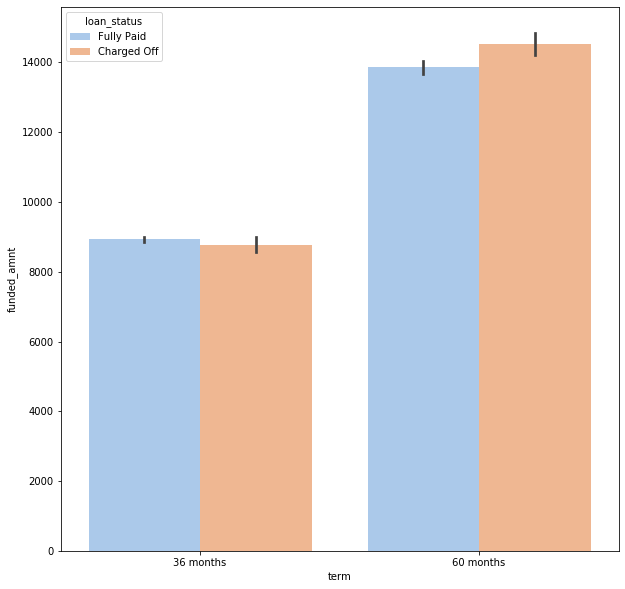

In [62]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='term', y='funded_amnt', hue ='loan_status',palette="pastel")
plt.show()

##### Observation:
60 months term loan have higher funding amount than 36 months and accordingly both Fully Paid and Charged Off is higher for 60 months

### 2. Funded amount vs. Interest Rate

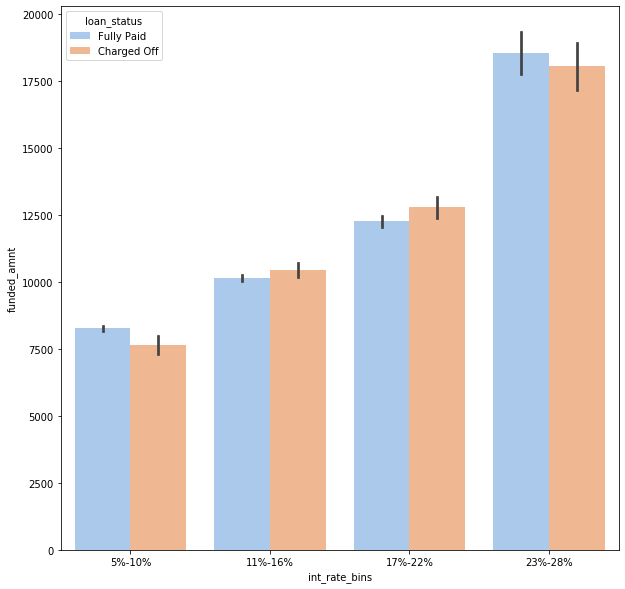

In [63]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='int_rate_bins', y='funded_amnt', hue ='loan_status',palette="pastel")
plt.show()

##### Observation:
Higher value loans are funded at higher interest rate,which is good source of business for bank

### 3.Funded amount vs. Annual income

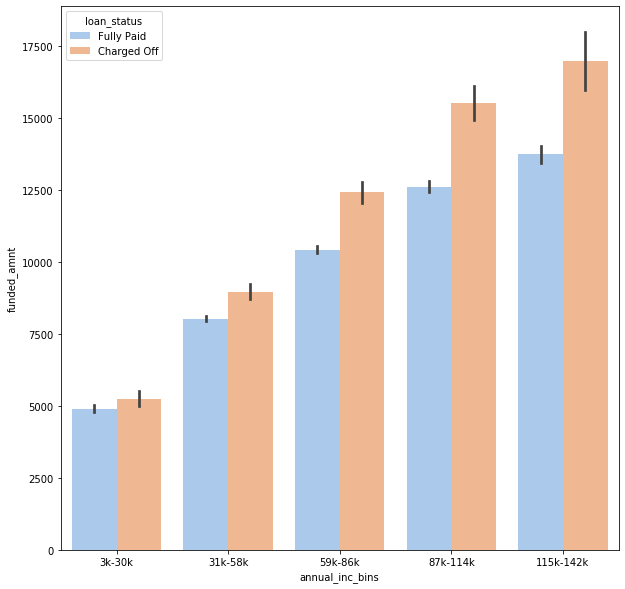

In [64]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='annual_inc_bins', y='funded_amnt', hue ='loan_status',palette="pastel")
plt.show()

##### Observation:
Higher value loans are funded to high income group borrowers

### 4.Funded amount vs. Loan purpose

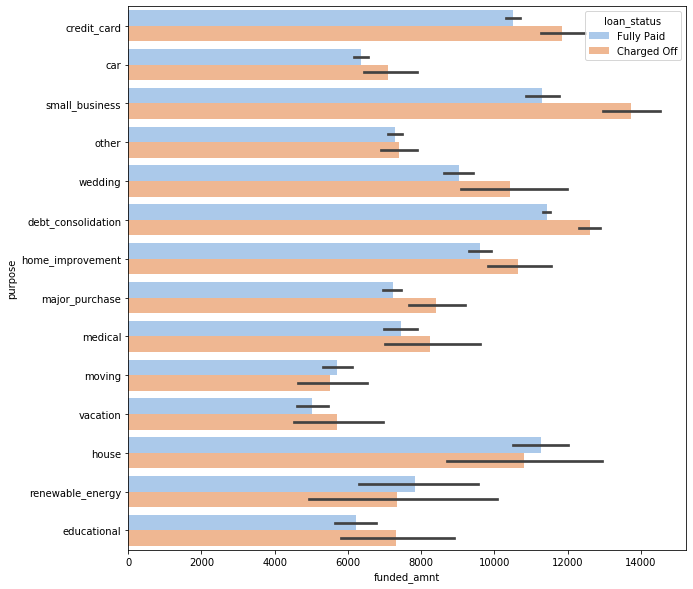

In [65]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='funded_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#####  Observation:
1.Most high value loans are funded for the purpose of Small business,Debt consolidation and Credit card.  
2.If its a high value loan and funded to Small Business Charge Off is more.

### 5.Funded amount vs. Years of employment

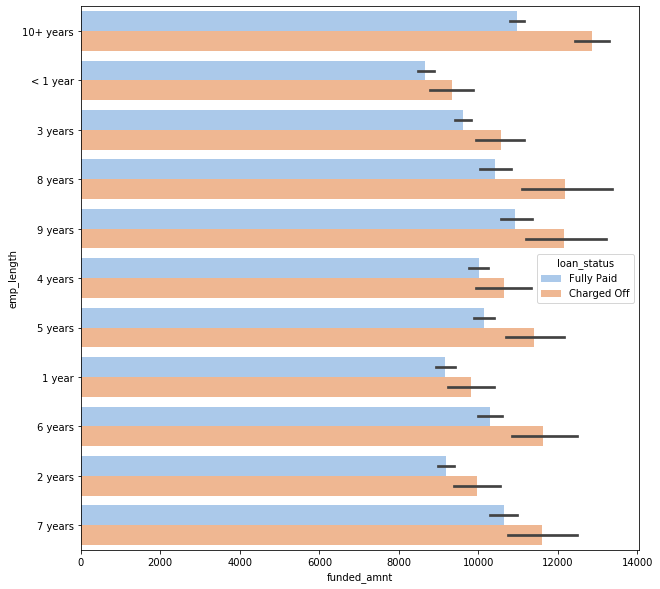

In [66]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='funded_amnt', y='emp_length', hue ='loan_status',palette="pastel")
plt.show()

##### Observation:
Most high value loans are Charged Off for borrowers with 10+ years of experience. 
 

## State

### 1. State vs. Annual income

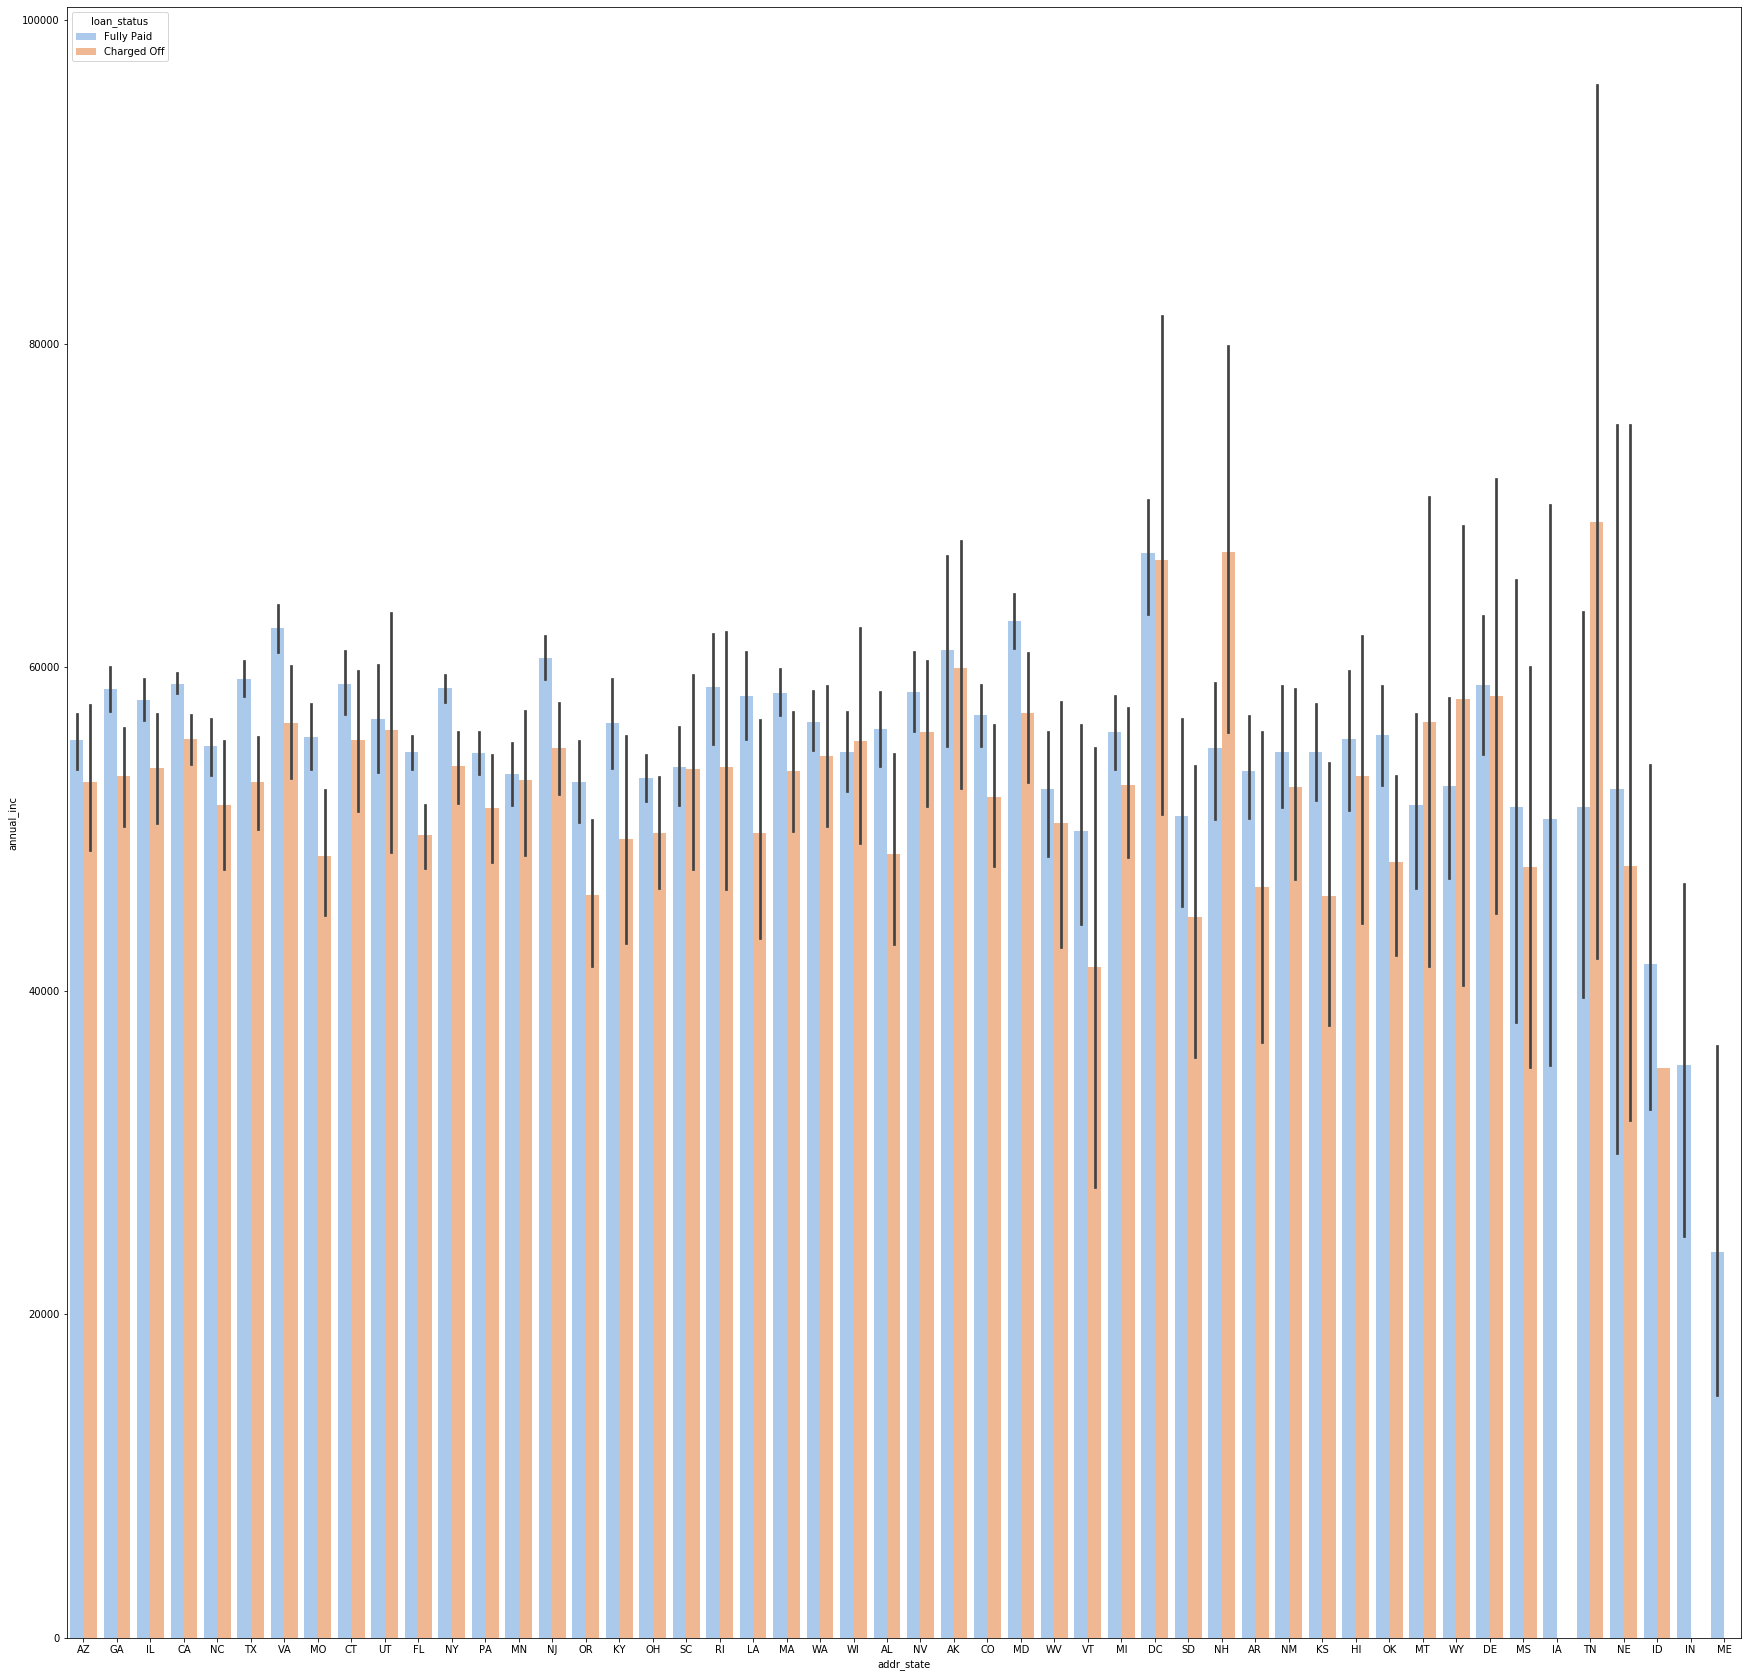

In [67]:
plt.figure(figsize=(30,30))
sns.barplot(data =loan,x='addr_state', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

##### Observation:
1.If the borrower has high annual income and is from the state of 'TN' they are more likely to Charge Off

2.If the borrower has high annual income and is from the state of 'DC' they are more like to fully pay their loans.  

### 2. State vs. Interest Rate

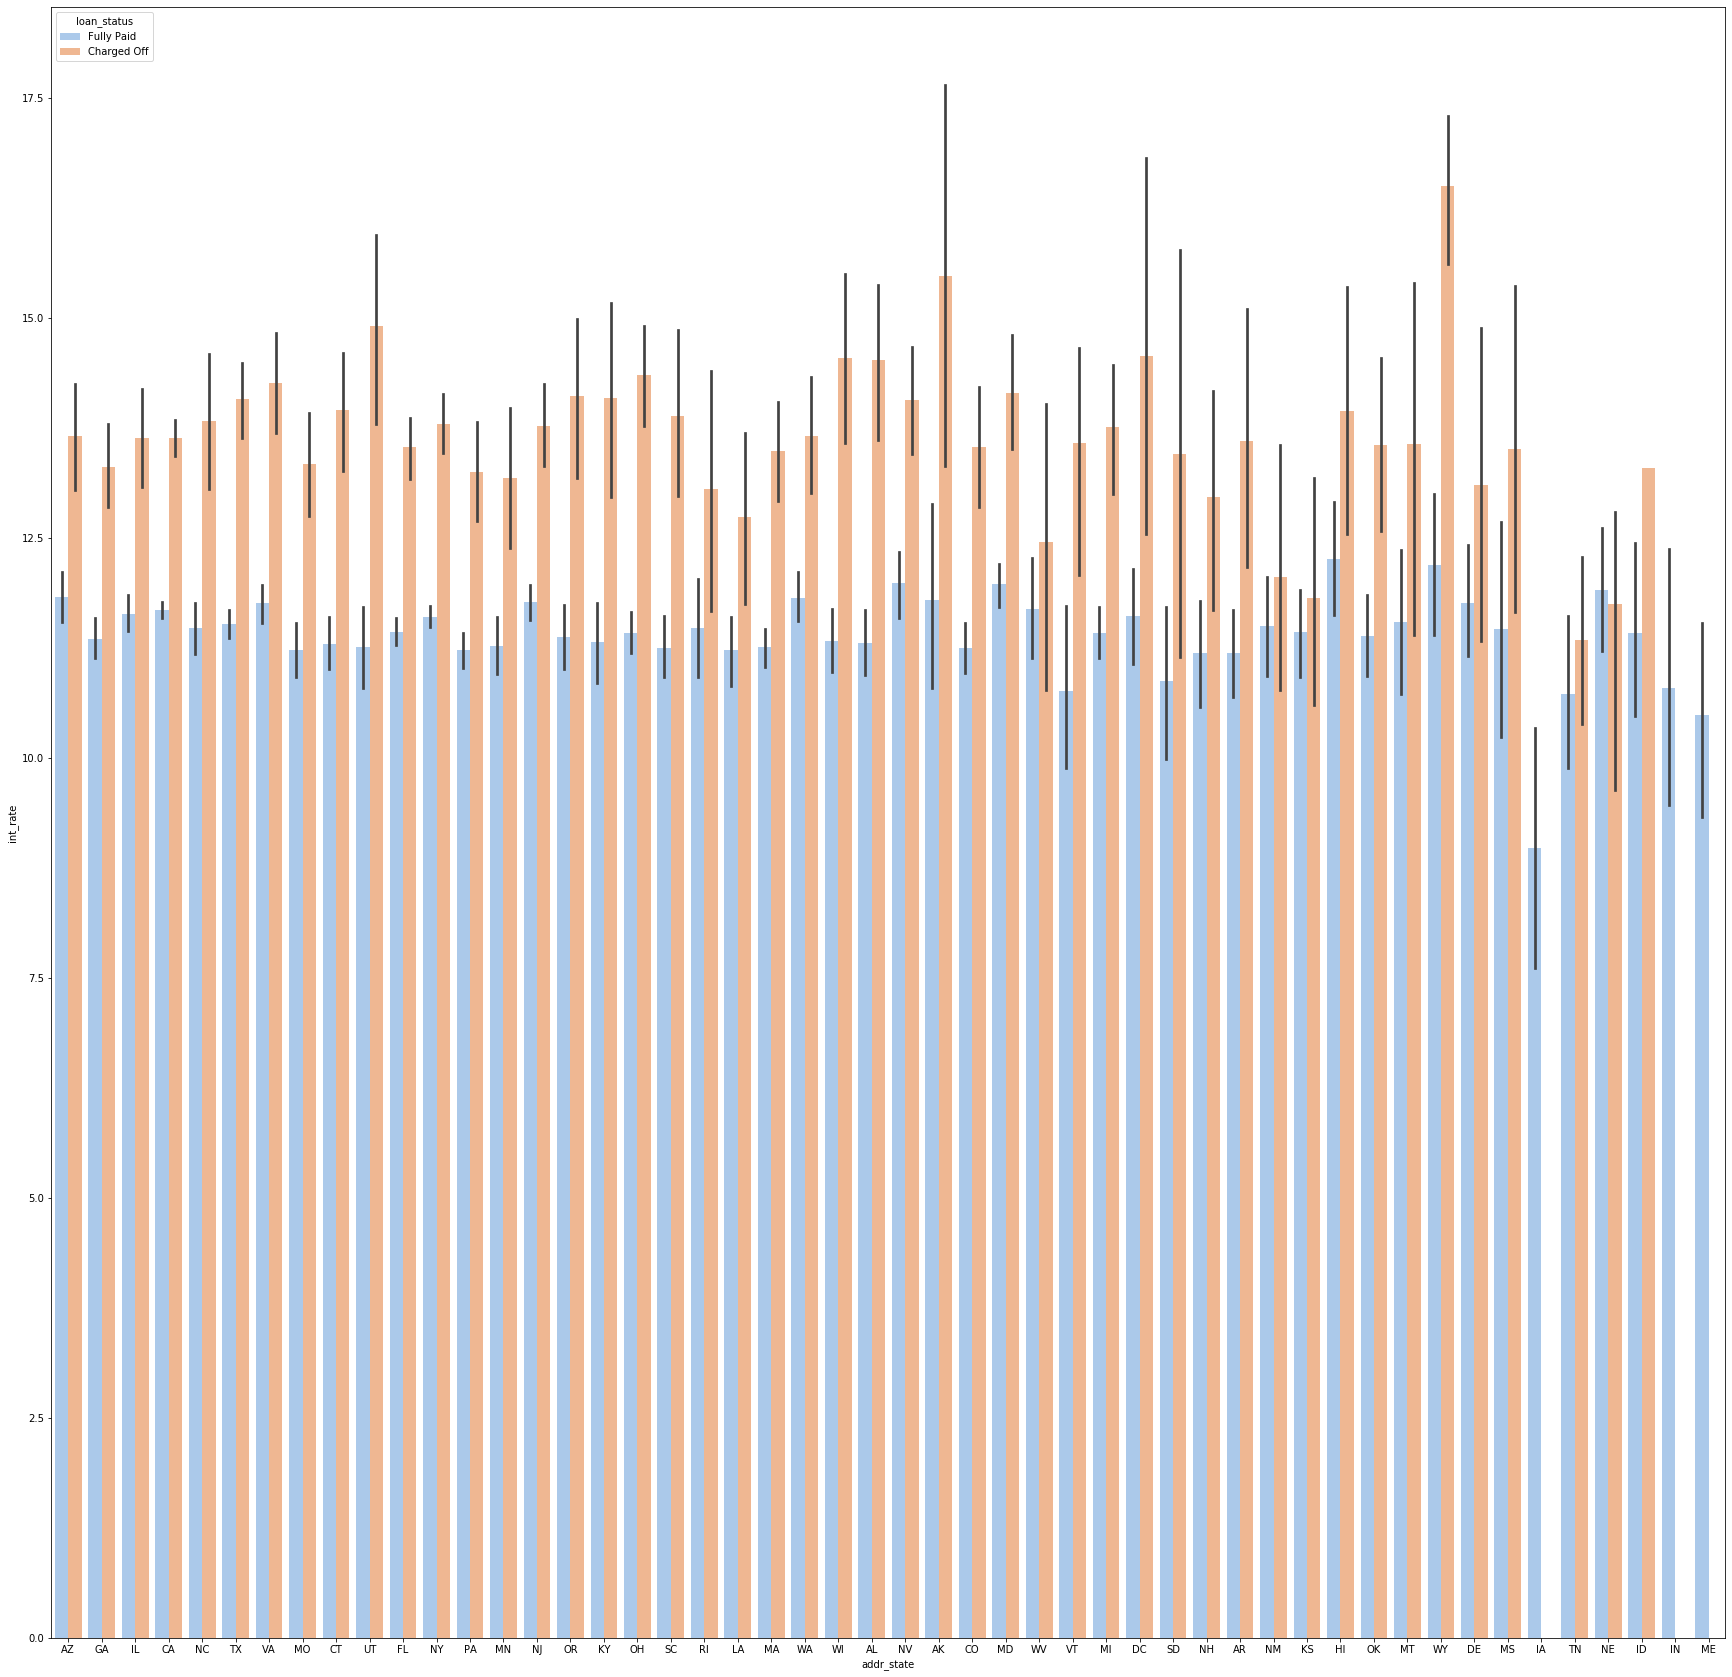

In [68]:
plt.figure(figsize=(30,30))
sns.barplot(data =loan,x='addr_state', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

##### Observation:
State of 'WY' has highest interest rate both in Charged Off and Fully Paid loans

## Loan Amount

### Loan Status vs. Loan amount

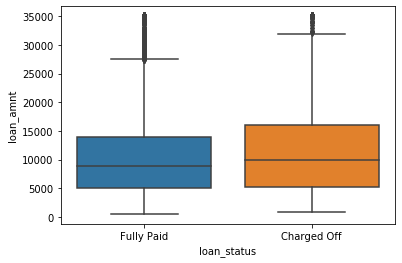

In [69]:
sns.boxplot(x='loan_status', y='loan_amnt', data=loan)

##### Observation: 
Charged Off loans have higher loan amount  than Fully Paid loans

### Home Ownership vs. Loan Amount

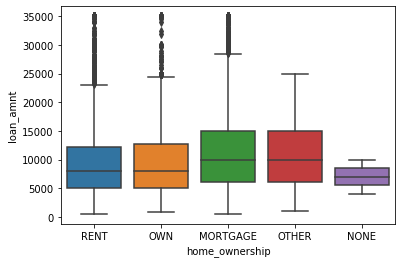

In [70]:
sns.boxplot(x='home_ownership', y='loan_amnt', data=loan)

##### Observation: 
Borrowers who live in mortgaged home have requested for higher loan amount

### Purpose vs. Loan amount

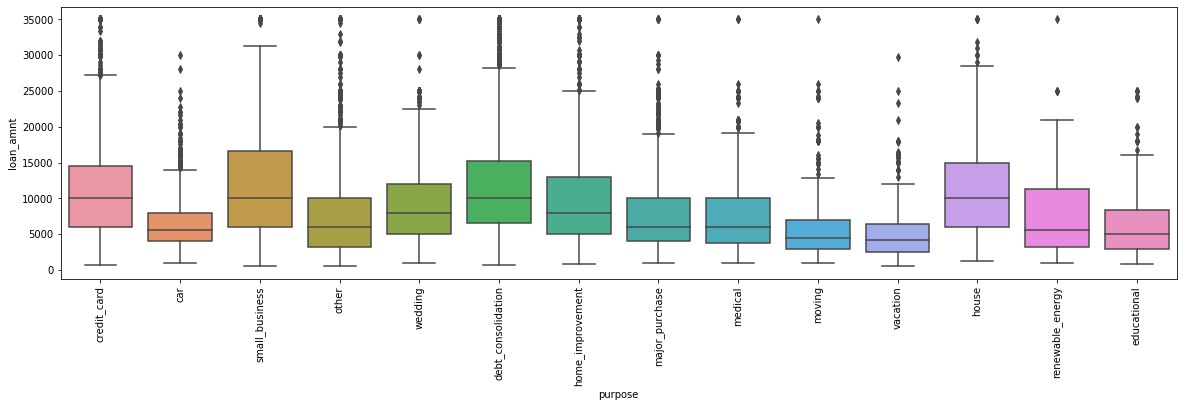

In [71]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.boxplot(x='purpose', y='loan_amnt', data=loan)

##### Observation: 
Higher loan amount is requested for Small business and Debt reconciliation 

### Issued year vs. Loan amount

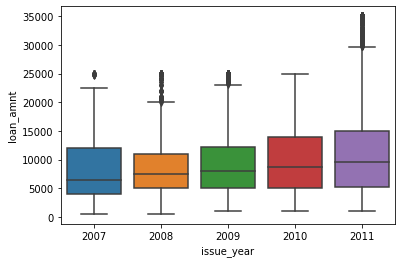

In [72]:
sns.boxplot(x='issue_year', y='loan_amnt', data=loan)

##### Observation: 
The median value for requested loan amount is almost similar each year

## Interest Rate

###  Loan status vs. Interest Rate 

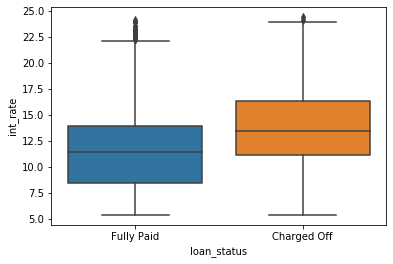

In [73]:
sns.boxplot(x='loan_status', y='int_rate', data=loan)

##### Observation: 
Interest rates for Charged Off loans were higher compared to Fully Paid loans

### Purpose vs. Interest Rate

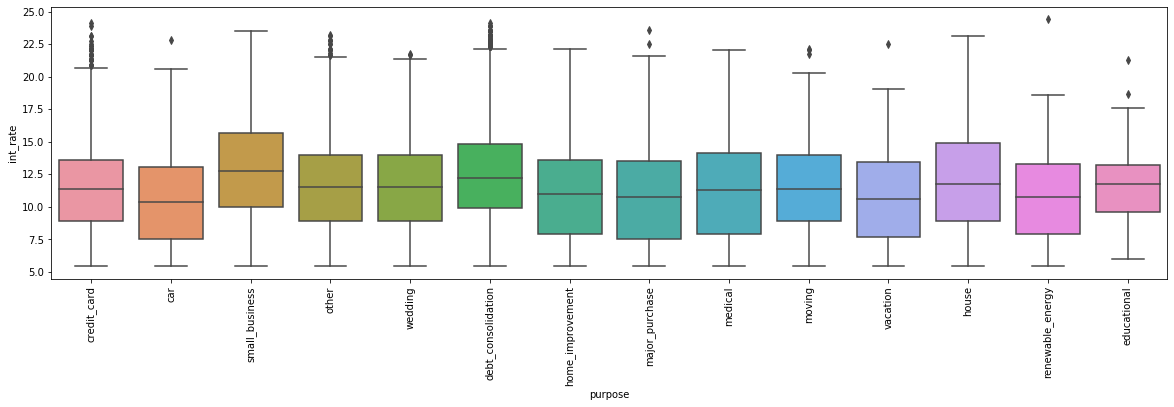

In [74]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.boxplot(x='purpose', y='int_rate', data=loan)

##### Observation: 
Interest rates are higher for loans for the purpose of Debt Consolidation,Small Business and House

## <font color='red'>Observations based on Bivariate analysis:
1.	60 months term loan have higher funding amount than 36 months and accordingly both Fully Paid and Charged Off loan is higher for 60 months.
2.	Higher value loans are funded at higher interest rate, which is good source of business for bank.
3.	Higher value loans are funded to high income group borrowers.
4.	Most high value loans are funded for the purpose of Small business, Debt consolidation and Credit card.  
5.	If its a high value loan and funded to Small Business Charge Off is more.
6.	Most high value loans are Charged Off for borrowers with 10+ years of experience.
7.	If the borrower has high annual income and is from the state of 'TN' they are more likely to Charge Off
8.	If the borrower has high annual income and is from the state of 'DC' they are more like to fully pay their loans.
9.	State of 'WY' has highest interest rate both in Charged Off and Fully Paid loans.
10.	Charged Off loans have higher loan amount  than Fully Paid loans.
11.	Borrowers who live in mortgaged home have requested for higher loan amount.
12.	Higher loan amount is requested for Small business and Debt reconciliation.
13.	The median value for requested loan amount is almost similar each year.
14.	Interest rates for Charged Off loans were higher compared to Fully Paid loans.
15.	Interest rates are higher for loans for the purpose of Debt Consolidation, Small Business and House</font>


# <font color='green'>Step4:Recommendations</font>

## <font color='red'>Recommendations:
1.	Be cautious while sanctioning loans taken for the purpose of Debt consolidation as they are Charged Off most often.
2.	Loans of grade B,C are more Charged Off so need to be more cautious with verification and number of loans offered in these grades.
3.	Loans of sub-grades B5 followed by B3 are more Charged Off, so verify the loan application more cautiously.
4.	In general the state of 'CA' has highest Charged Off loan, but among the high income group of borrowers the state of 'TN' has highest Charged Off loan.
5.	The bank should verify the loan applications thoroughly since Charge Off is highest among loans with status ‘Unverified’.
6.	People who live in Rented homes have higher Charged Off loans so bank needs to be cautious of such applicants.
7.	The loans in the interest range 11-16% are most often charged so bank need to set the right interest rate.
8.	Borrowers with annual income in the range of 31K-58K are most likely to have Charged Off loan, so bank should target borrowers in other income group.
9.	Bank should continue charging higher interest rate for high value loan as its good business value.
10.	Bank should continue funding high value loan to high income group because they can repay it.
11.	Bank should strictly avoid funding high value loan to ‘Small business’ because Charge Off is high there. Small business doesnt seem to handle high value loan very well.
12.	Prefer offering high value loan in the state of ‘DC’(where completely paying loan is highest) and try to avoid as much possible  in the state of ‘TN’.</font>
